In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
file_path = '../data/preprocessed_data.csv'
df = pd.read_csv(file_path, index_col = 0)

In [150]:
df

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,record_count,multiple_records
2006-09-05,P09588,Velachery,1626,37,2.0,1.0,4,family,yes,1966-09-15,...,c,3.4,4.0,3.2,3.610,309148,100019,9092600,1,0
2006-09-06,P09585,Velachery,1857,14,3.0,2.0,5,abnormal,yes,1998-09-08,...,rl,4.2,3.1,3.3,3.440,631215,161850,16185010,1,0
2006-09-07,P09570,Velachery,1930,140,3.0,2.0,5,adjland,no,1962-10-09,...,rm,3.9,2.2,3.0,2.870,355606,248924,11853530,1,0
2006-09-08,P09581,Velachery,1986,101,3.0,2.0,5,partial,no,1952-09-21,...,rm,3.0,2.4,2.8,2.670,404059,103605,10360480,1,0
2006-09-09,P09580,Velachery,1559,107,2.0,1.0,4,adjland,yes,1958-09-21,...,c,2.5,4.7,4.7,4.150,415983,181992,12999460,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-14,P00005,Chrompet,704,52,1.0,1.0,2,partial,no,1976-02-26,...,rh,3.9,2.1,2.2,2.670,162460,81230,6248450,1,0
2015-02-15,P00004,Anna Nagar,1973,81,2.0,1.0,5,normal sale,yes,1993-02-22,...,rm,4.5,2.0,3.7,3.555,524343,145651,14565090,1,0
2015-02-16,P00006,Chrompet,1151,7,1.0,1.0,3,partial,no,1994-02-21,...,rh,4.9,3.0,3.1,3.600,217114,25052,8350550,1,0
2015-02-17,P00001,Chrompet,1066,176,1.0,1.0,3,abnormal,no,1985-02-24,...,rm,4.9,3.6,2.5,3.660,409401,62031,12406100,2,1


In [151]:
# creating a new column property_age using date_sale and date_build columns
df.index = pd.to_datetime(df.index)
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

df['PROPERTY_AGE'] = (df.index - df['DATE_BUILD']).dt.days / 365.25

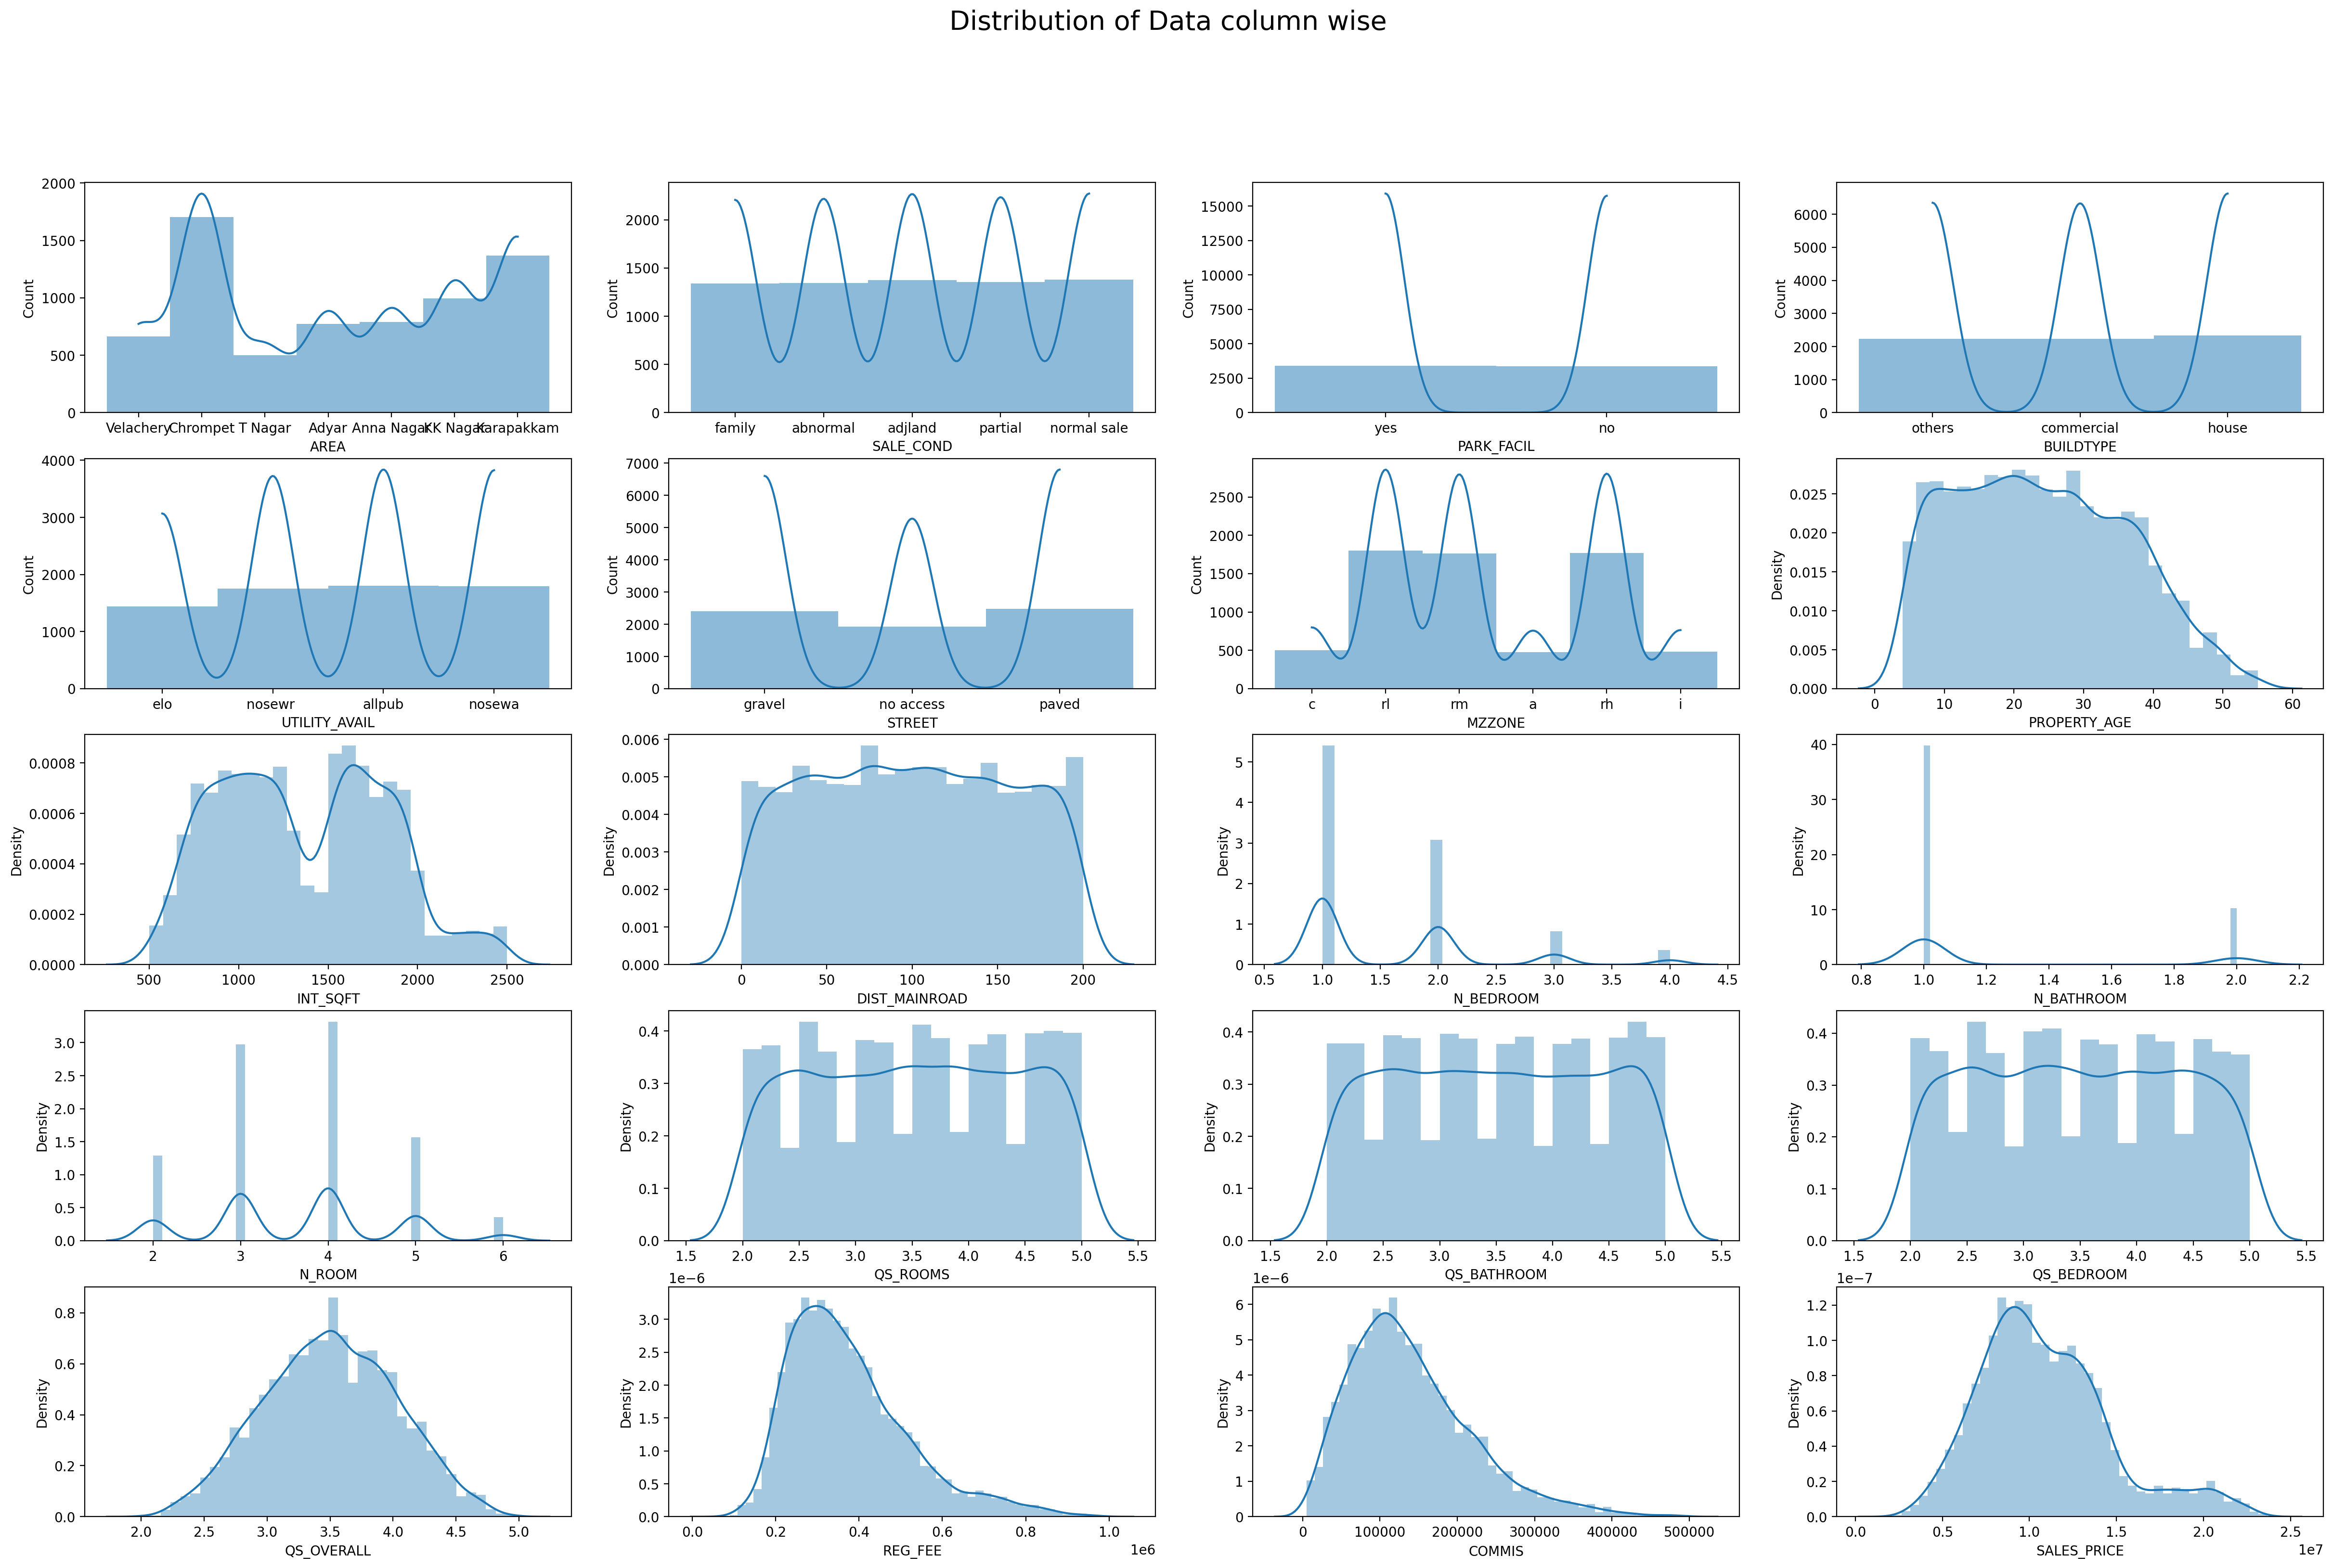

In [152]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df.AREA, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(df.SALE_COND, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(df.PARK_FACIL, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(df.UTILITY_AVAIL, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(df.STREET, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(df.MZZONE, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(df.PROPERTY_AGE)

plt.subplot(5,4,9)
sns.distplot(df.INT_SQFT)

plt.subplot(5,4,10)
sns.distplot(df.DIST_MAINROAD)

plt.subplot(5,4,11)
sns.distplot(df.N_BEDROOM)

plt.subplot(5,4,12)
sns.distplot(df.N_BATHROOM)

plt.subplot(5,4,13)
sns.distplot(df.N_ROOM)

plt.subplot(5,4,14)
sns.distplot(df.QS_ROOMS)

plt.subplot(5,4,15)
sns.distplot(df.QS_BATHROOM)

plt.subplot(5,4,16)
sns.distplot(df.QS_BEDROOM)

plt.subplot(5,4,17)
sns.distplot(df.QS_OVERALL)

plt.subplot(5,4,18)
sns.distplot(df.REG_FEE)

plt.subplot(5,4,19)
sns.distplot(df.COMMIS)

plt.subplot(5,4,20)
sns.distplot(df.SALES_PRICE)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

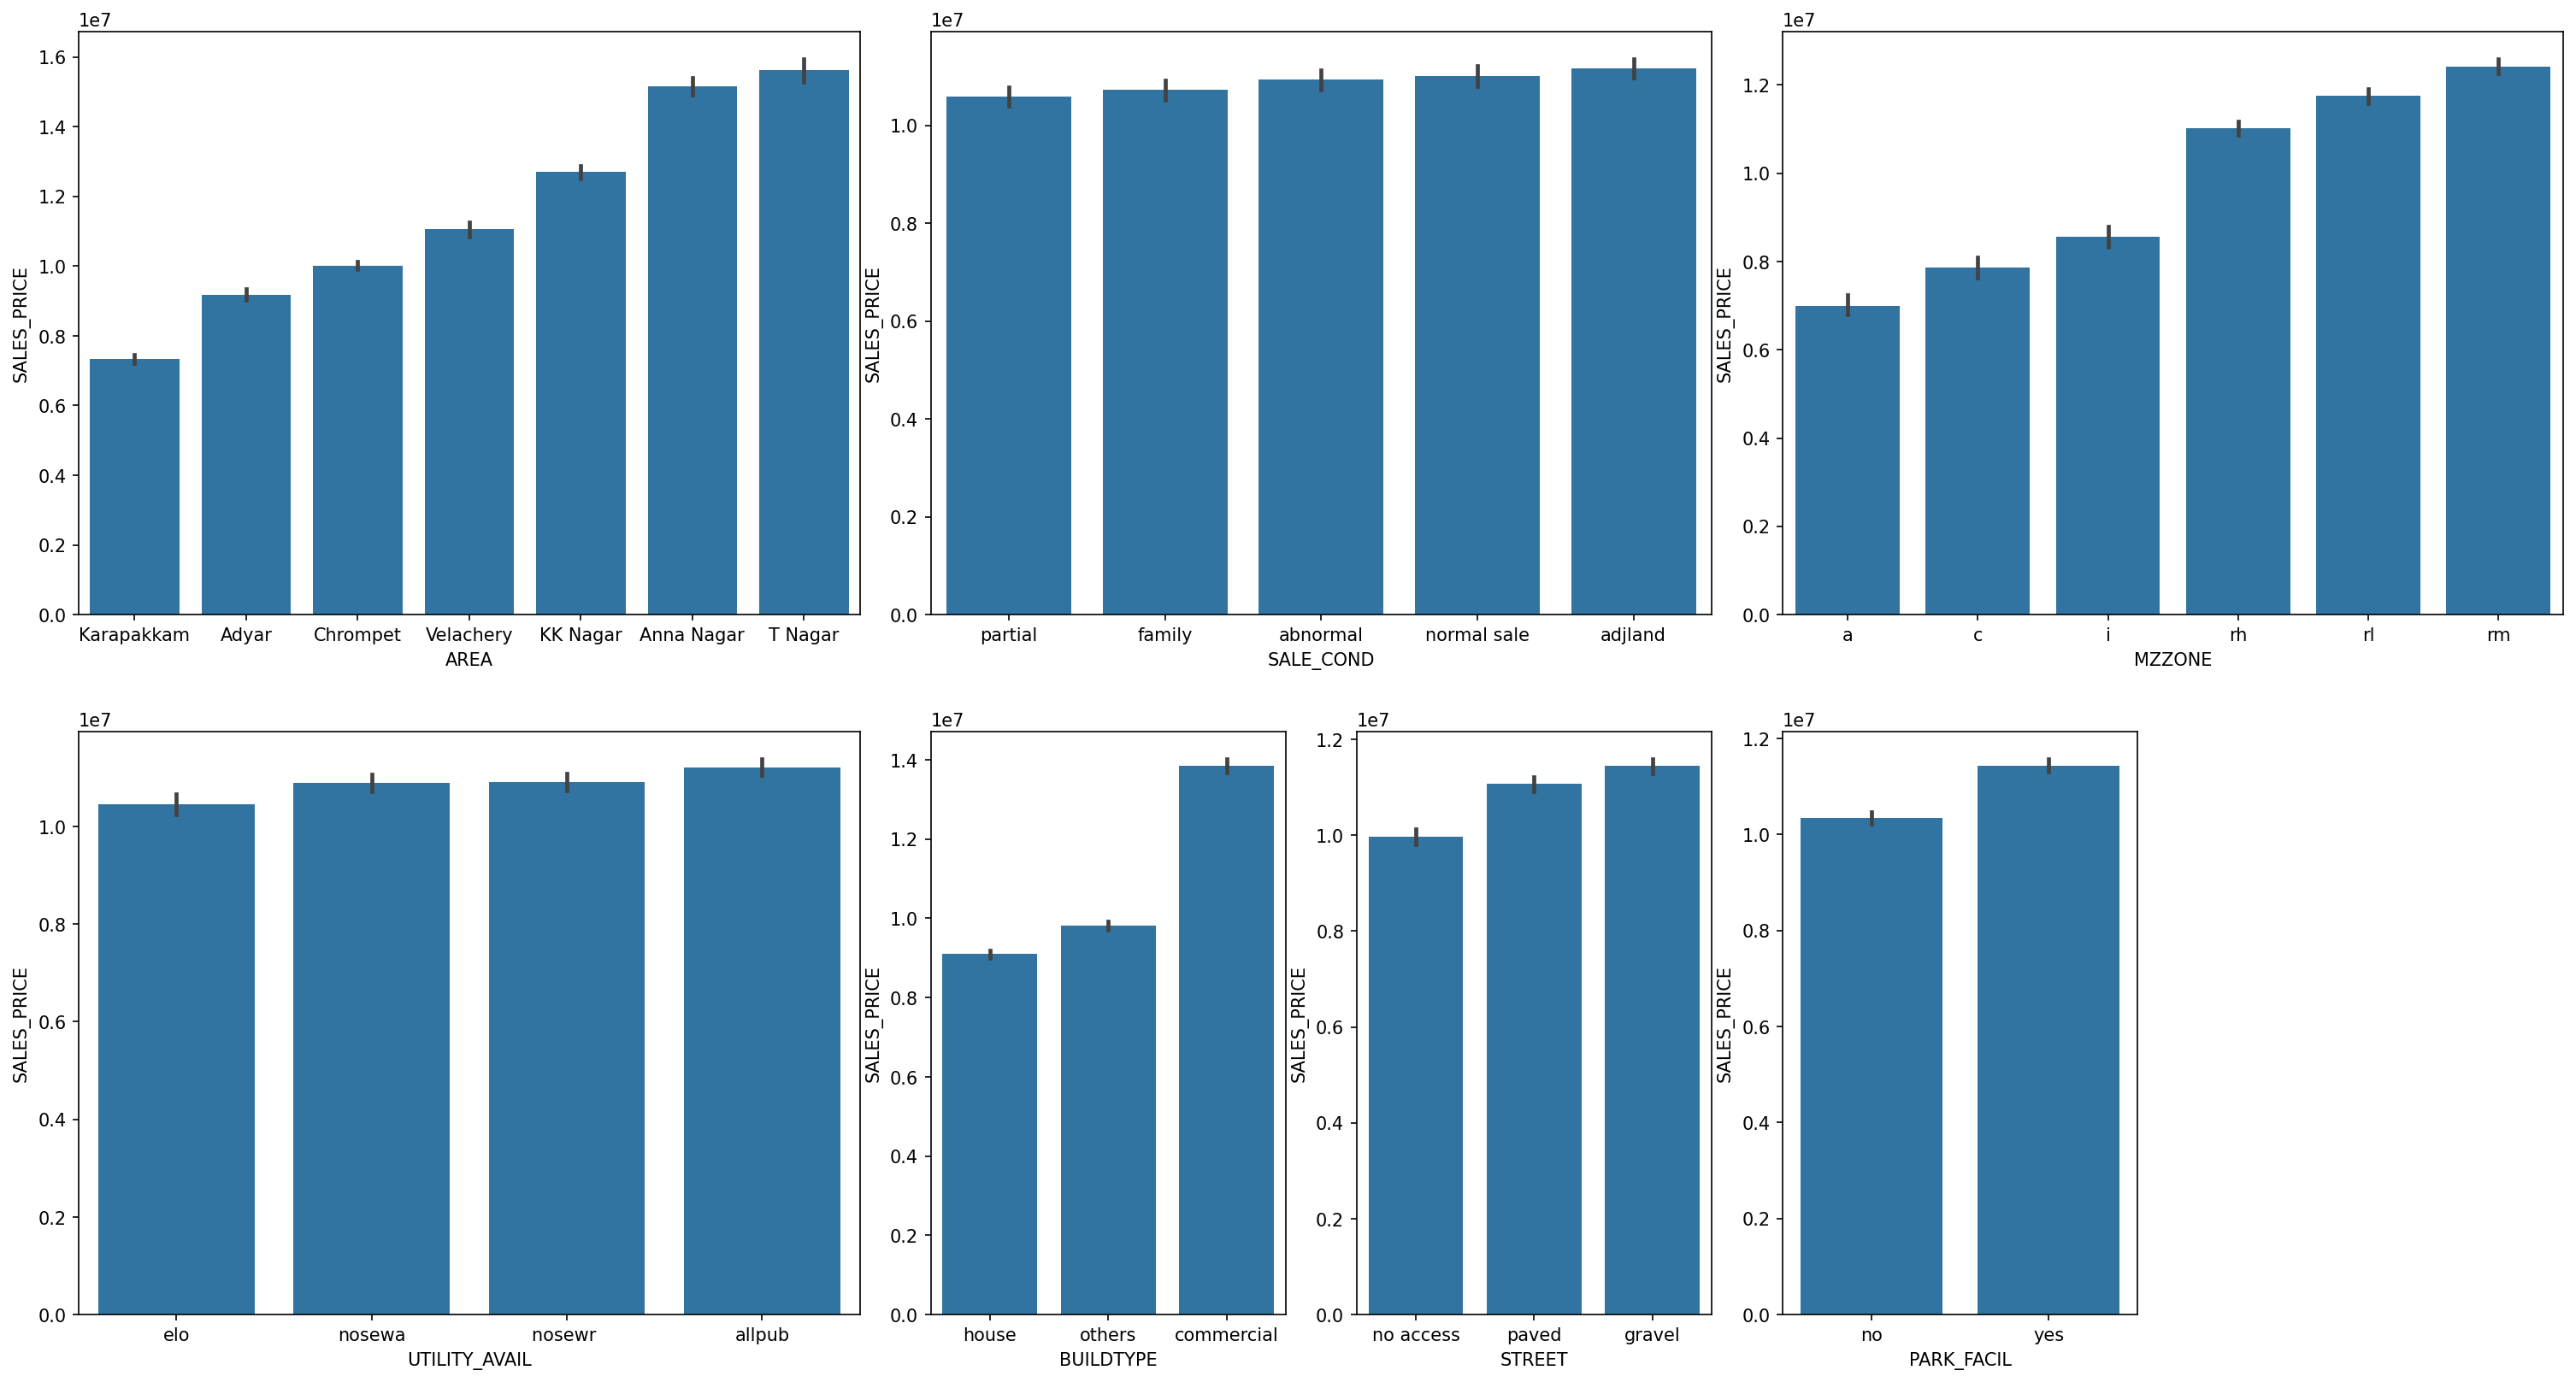

In [153]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

plt.show()

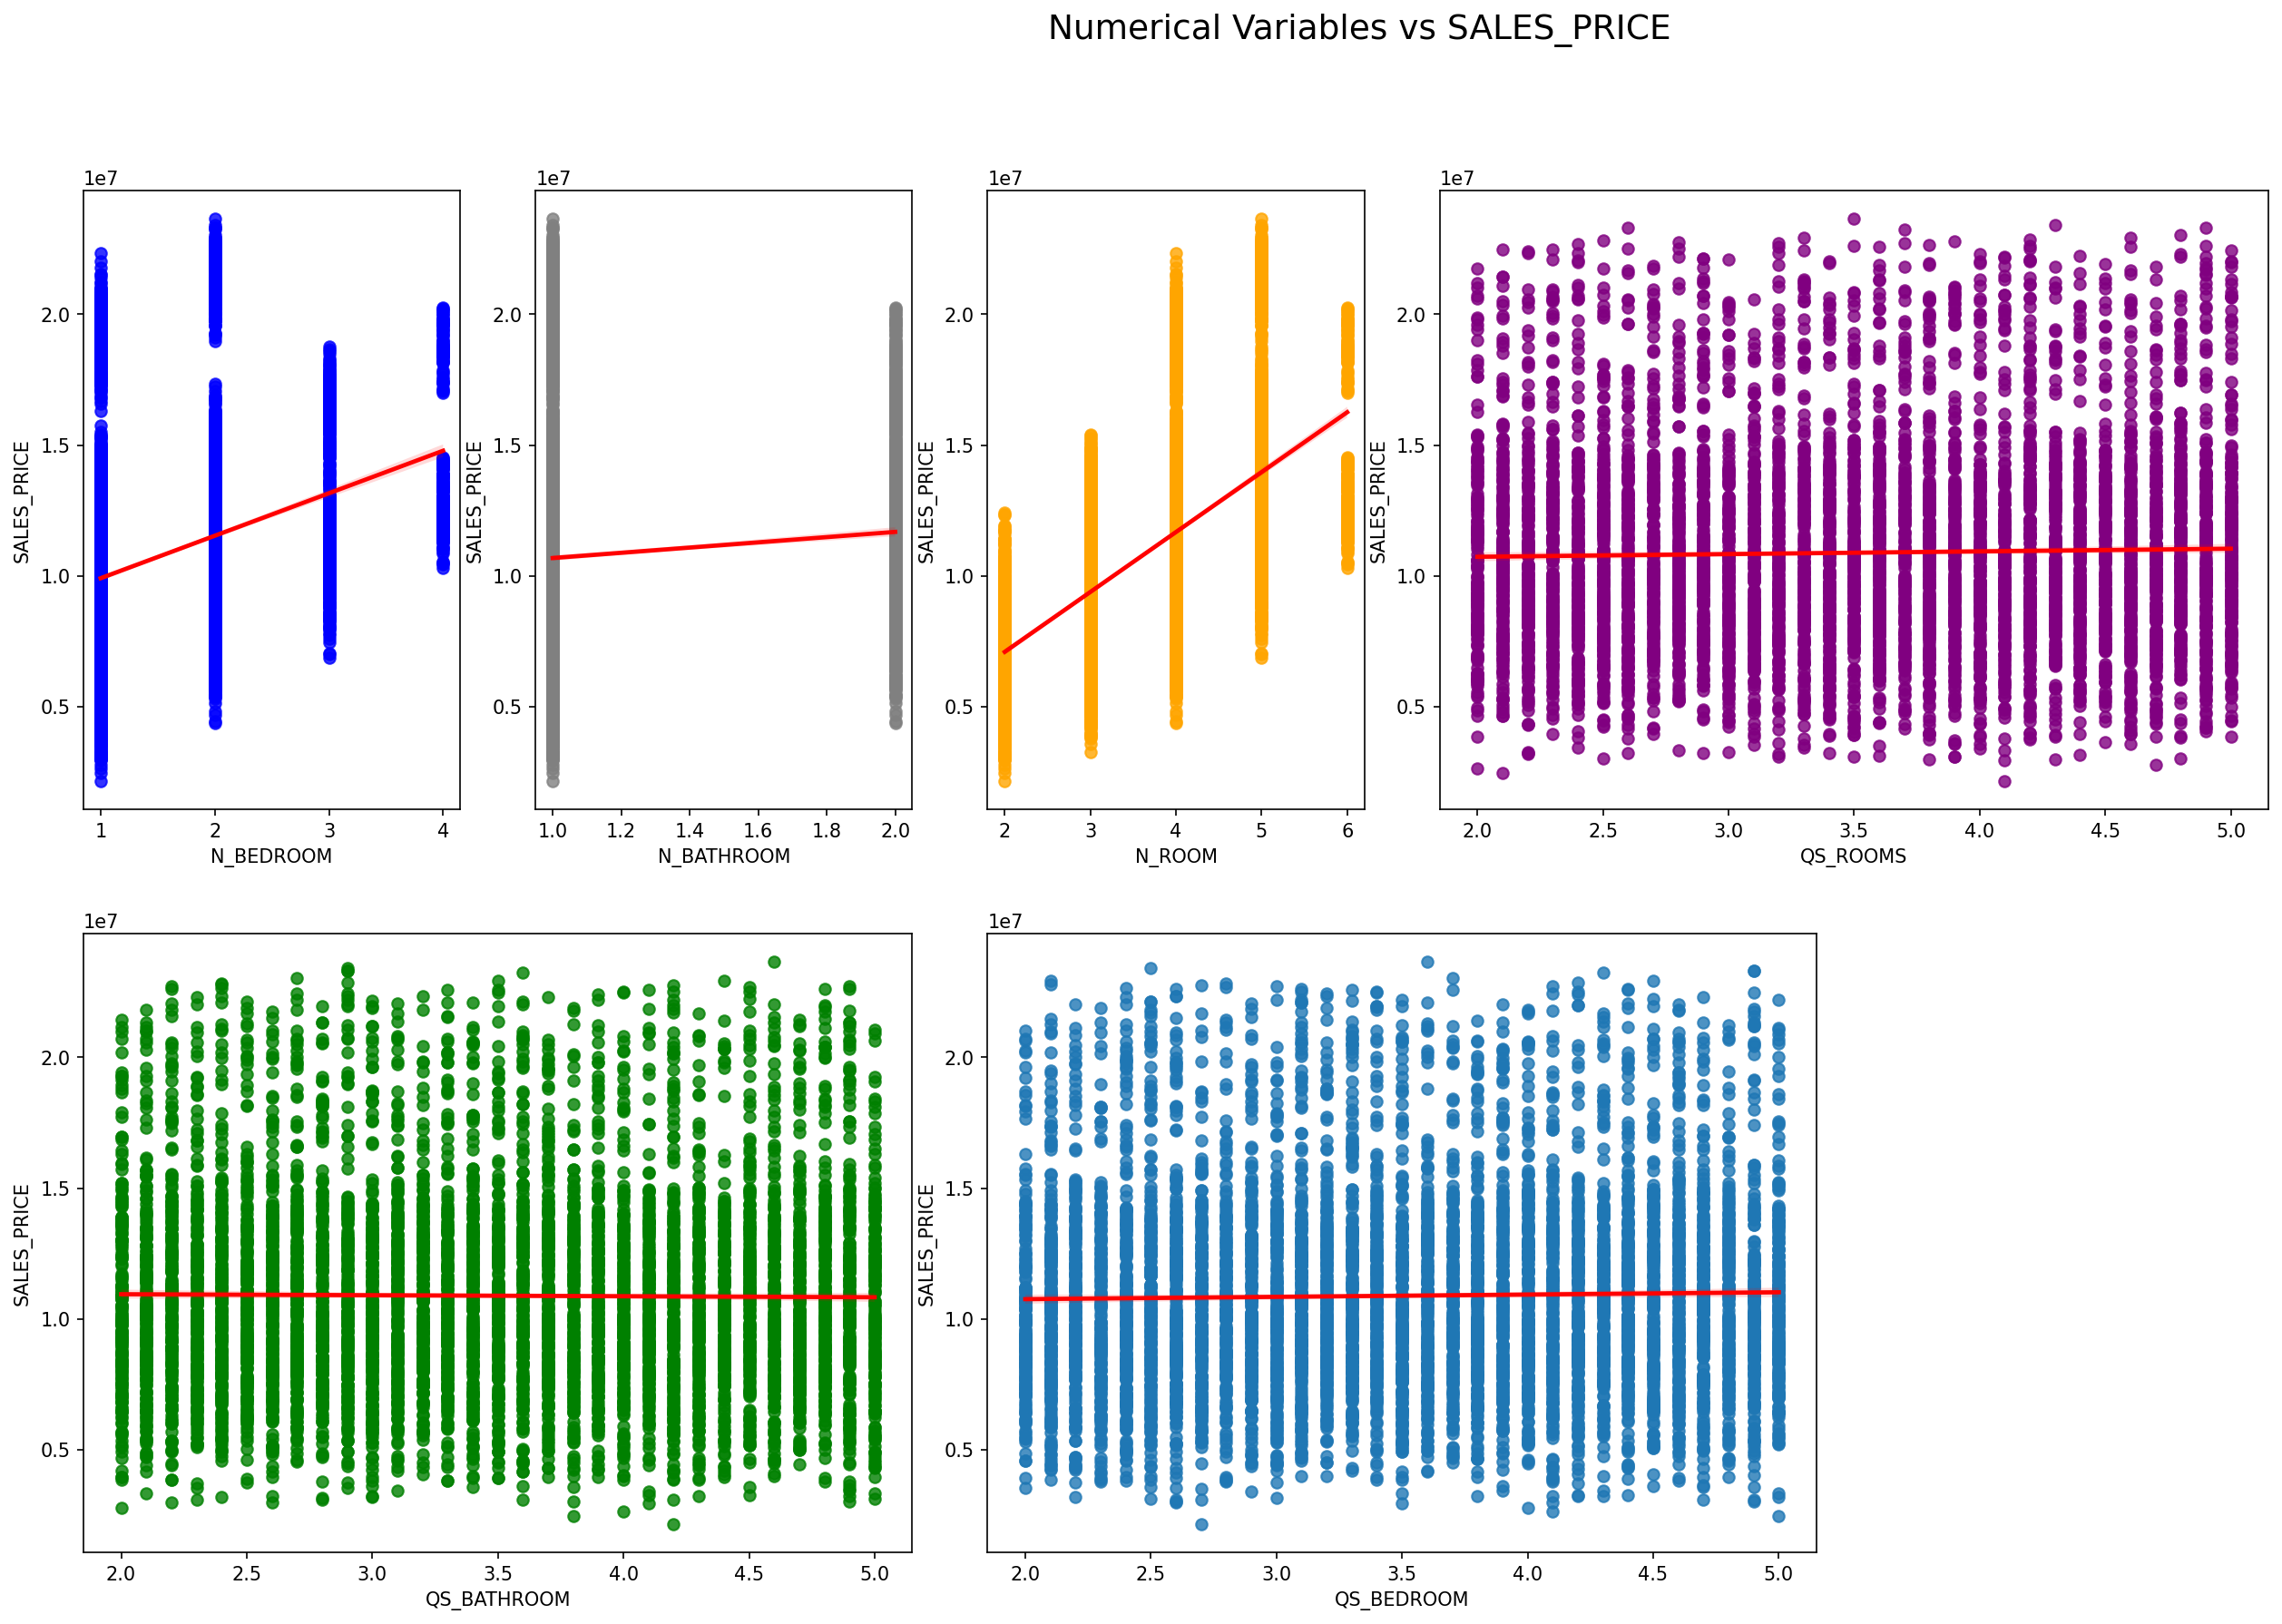

In [154]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot( x = df.N_BEDROOM, y = df.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot( x = df.N_BATHROOM, y = df.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot( x = df.N_ROOM, y = df.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot( x = df.QS_ROOMS, y = df.SALES_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot( x = df.QS_BATHROOM, y = df.SALES_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot( x = df.QS_BEDROOM, y = df.SALES_PRICE, line_kws={"color": "red"})

plt.suptitle("Numerical Variables vs SALES_PRICE", fontsize=18)
plt.show()

In [155]:
# Removing columns which has no relationship with SALES_PRICE

df.drop(columns = ['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'REG_FEE', 'COMMIS', 'record_count', 'multiple_records', 'QS_OVERALL'], inplace = True)

In [156]:
#Removing Street column as it doesn't follow the correct order of it's category
df.drop(columns = ['STREET'], inplace = True)

In [157]:
#Removing bedroom and bathroom column as we already have the count of all rooms in N_ROOM column
df.drop(columns = ['N_BEDROOM', 'N_BATHROOM'], inplace = True)

In [158]:
# Encoding the AREA column according to the Ranking of Areas as we see in the plot
df.AREA = df.AREA.map({'T Nagar':7, 'Anna Nagar':6, 'Velachery':5, 'KK Nagar':4, 'Chrompet':3, 'Adyar':2, 'Karapakkam':1})

In [159]:
# Encoding the PARK_FACIL column
df.PARK_FACIL = df.PARK_FACIL.map({'yes':1,
                                       'no':0})

In [160]:
# Encoding utility_avail column 
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})

In [161]:
# Encoding sale_cond column
df.SALE_COND = df.SALE_COND.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

In [162]:
# Encoding mzzone column 
df.MZZONE = df.MZZONE.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})


In [163]:
#Encoding buildtype column
df = pd.get_dummies(df,columns=['BUILDTYPE'])

In [164]:
df.dtypes

PRT_ID                          object
AREA                             int64
INT_SQFT                         int64
DIST_MAINROAD                    int64
N_ROOM                           int64
SALE_COND                        int64
PARK_FACIL                       int64
DATE_BUILD              datetime64[ns]
UTILITY_AVAIL                    int64
MZZONE                           int64
SALES_PRICE                      int64
PROPERTY_AGE                   float64
BUILDTYPE_commercial              bool
BUILDTYPE_house                   bool
BUILDTYPE_others                  bool
dtype: object

In [165]:
# Convert only the specific columns (e.g., those that start with 'BUILDTYPE') to integers
df[['BUILDTYPE_commercial', 'BUILDTYPE_house', 'BUILDTYPE_others']] = df[['BUILDTYPE_commercial', 'BUILDTYPE_house', 'BUILDTYPE_others']].astype(int)

In [166]:
df.dtypes

PRT_ID                          object
AREA                             int64
INT_SQFT                         int64
DIST_MAINROAD                    int64
N_ROOM                           int64
SALE_COND                        int64
PARK_FACIL                       int64
DATE_BUILD              datetime64[ns]
UTILITY_AVAIL                    int64
MZZONE                           int64
SALES_PRICE                      int64
PROPERTY_AGE                   float64
BUILDTYPE_commercial             int32
BUILDTYPE_house                  int32
BUILDTYPE_others                 int32
dtype: object

In [167]:
df['AREA_INT_SQFT'] = df['AREA'] * df['INT_SQFT']
df['AREA_N_ROOM'] = df['AREA'] * df['N_ROOM']

In [168]:
# Sort the DataFrame by 'sales_price' to ensure correct grouping based on 'sales_price'
df_filtered = df.sort_values('SALES_PRICE')
df.index = pd.to_datetime(df.index)
df_filtered.index = pd.to_datetime(df_filtered.index)

In [169]:
# Drop duplicates, keeping the row with the smallest 'sales_price' for each index ('Date')
df_filtered_by_sales_price = df_filtered[~df_filtered.index.duplicated(keep='first')]

# Sort the resulting DataFrame by 'Date'
df_filtered_by_sales_price = df_filtered_by_sales_price.sort_index()

# Calculate the mean and standard deviation
mean = df_filtered_by_sales_price['SALES_PRICE'].mean()
std = df_filtered_by_sales_price['SALES_PRICE'].std()

# Define a threshold for outliers, e.g., 3 standard deviations
threshold = 3

# Filter the DataFrame to remove outliers
df_no_outliers = df_filtered_by_sales_price[(df_filtered_by_sales_price['SALES_PRICE'] >= mean - threshold * std) & 
                             (df_filtered_by_sales_price['SALES_PRICE'] <= mean + threshold * std)]

# Check the size of the new DataFrame without outliers
print(f"Original size: {df_filtered_by_sales_price.shape[0]}, Size after removing outliers: {df_no_outliers.shape[0]}")

# Generate a complete date range from the start to the end of the data
full_date_range = pd.date_range(start=df_no_outliers.index.min(), end=df_no_outliers.index.max(), freq='D')

# Create a DataFrame with NaN values for the complete date range
df_full_dates = pd.DataFrame(index=full_date_range)

# Reset index of the original dataframe to preserve duplicates
df_reset = df_no_outliers.reset_index()  # Now 'Date' column is available

# Merge the dataframes to fill in the missing dates
df_combined = pd.merge(df_full_dates, df_reset, how='left', left_index=True, right_on='index')

# Re-set the 'Date' column as the index if required
df_combined.set_index('index', inplace=True)

# Handle NaN values for missing dates (example using forward fill)
df_combined.fillna(method='ffill', inplace=True)

# Check the combined DataFrame
print("DataFrame after merging:")
print(df_combined.head())

Original size: 3042, Size after removing outliers: 3008
DataFrame after merging:
            PRT_ID  AREA  INT_SQFT  DIST_MAINROAD  N_ROOM  SALE_COND  \
index                                                                  
2006-09-05  P09588   5.0    1626.0           37.0     4.0        2.0   
2006-09-06  P09585   5.0    1857.0           14.0     5.0        3.0   
2006-09-07  P09570   5.0    1930.0          140.0     5.0        5.0   
2006-09-08  P09581   5.0    1986.0          101.0     5.0        1.0   
2006-09-09  P09580   5.0    1559.0          107.0     4.0        5.0   

            PARK_FACIL DATE_BUILD  UTILITY_AVAIL  MZZONE  SALES_PRICE  \
index                                                                   
2006-09-05         1.0 1966-09-15            1.0     2.0    9092600.0   
2006-09-06         1.0 1998-09-08            3.0     5.0   16185010.0   
2006-09-07         0.0 1962-10-09            1.0     6.0   11853530.0   
2006-09-08         0.0 1952-09-21            4.0 

In [170]:
file_path = '../data/feature_engineered_data.csv'
df_combined.to_csv(file_path, index = True)